<a href="https://colab.research.google.com/github/jdr98/TP1/blob/master/TP_1_Jorge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP 1 Jorge

Contamos y mostramos las palabras clave mas utilizadas en los tweets


In [0]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Contamos y mostramos desde que locaciones fueron generados esos tweets, vemos que los primeros corresponde a USA, NY y United States, seguidos por Lodres u Canadá, notamos que la información no discrimina por pais, ciudad, capitales, etc. por lo tanto habría que ver como segmentar esta información para obtener mejores resultados de consultas.

In [0]:
# [J] count de text
train['location'].value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Dorset, United Kingdom          1
Campinas Sp                     1
Wyoming, MI (Grand Rapids)      1
Suitland                        1
Saipan, CNMI                    1
Name: location, Length: 3341, dtype: int64

En esta sección mostramos los textos más tweeteados en la red social

In [0]:
# [J] contar tweet mas compartidos
tweet_per_text = train['text'].value_counts()
tweet_per_text.head()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
Name: text, dtype: int64

Respecto a los tweets si son reales [1] o no [0], realizamos un conteo de los mismos y los mostramos.

In [0]:
# [J] cuantos tweets son reales (1) y cuantos NO lo son (0)
tweet_real_or_not = train['target'].value_counts()
tweet_real_or_not

0    4342
1    3271
Name: target, dtype: int64

Creamos una visualización de los la cantidad de tweets sobre desastres reales [1] respecto a los que no lo son [0]. La visualización es para mostrar con más énfasis que hay más tweets falsos que reales respecto a desastres naturales.

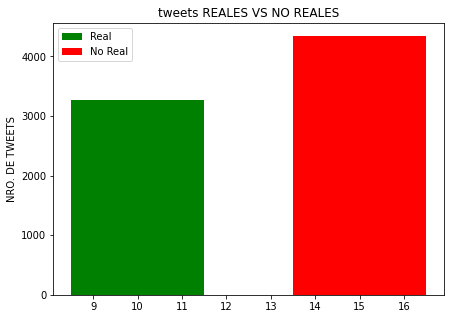

In [0]:
# DV TWEET TARGET REAL [1] O NO [0] 
Real = train[train['target'] == 1].shape[0]
Not = train[train['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real,3, label="Real", color='green')
plt.bar(15,Not,3, label="No Real", color='red')
plt.legend()
plt.ylabel('NRO. DE TWEETS')
plt.title('tweets REALES VS NO REALES')
plt.show()

Directamente aplicamos una limpieza de cualquier ceda que tenga datos nulos y eliminamos esas celdas por completo, nos quedamos con 5080 celdas respecto al  inicio que habían 7613.

In [0]:
# [J] Limpiar NaN del data frame
train.dropna(inplace = True)
print(len(train))

5080


Sacamos la columna inicial y asignamos como índice a la columna Id, correspondiente a cada tweet.

In [0]:
# [J] Defino Id como indice
df_id = train.set_index(['id'])
df_id

,keyword,location,text,target
id,,,,
48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0


Renombramos a las columnas:
  - TARGET --> (NOT)REAL ([1] REAL, [0] NO REAL)
  - TEXT   --> Content_text, contenido de los tweets.

In [0]:
# [J] Renombro columna target y text
col_rename={'target':'(NOT)real', 'text':'content_tweet'}
df_renom_col = train.rename(columns = col_rename)
df_renom_col

,id,keyword,location,content_tweet,(NOT)real
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
